# What this file contains

-   Playing with Bloch sphere

In [1]:
"""
The code for the Bloch sphere evolution of a qubit under the influence of a Rabi pulse.

By Miko 

Follow the qutip documentation to see the Bloch sphere evolutions. 

Note that this is for a qubit (number of states is 2)
"""

import numpy as np
import matplotlib.pyplot as plt
from qutip import *


bloch_sphere = Bloch() #create a Bloch


# --- DEFINE INITIAL VECTOR --- 
def define_init_state(a, b, phase_diff):
    '''
    INPUT:
        a (b) --- probability of being in state a(b)
        phase_diff --- phase difeference between the states 
    OUTPUT: 
        init_state --- initial state of the qubit
    '''
    
    init_state = a * basis(2, 0) + b*np.exp(1j*phase_diff)*basis(2, 1)
    init_state = Qobj(init_state).unit()
    return init_state 
    


# --- DEFINE THE EVOLUTION HAMILTONIAN --- 
def Hamiltonian(Omega_Rabi, detu, light_phase):
    '''
    INPUT:
        Omega_Rabi --- Rabi frequency
        detu --- detuning from the frequency 
        light_phase --- phase of the pulse
    '''
    # Construct the Hamiltonian
    H_diag = -(detu * sigmaz())
    # sin and cosine is an extension of what we have in lecture 6 treutlein
    H_offdiag =  Omega_Rabi * ( np.cos(light_phase)*sigmax() + np.sin(light_phase)*sigmay() )
    H = 0.5*(H_diag + H_offdiag)
    
    # Compute expectation values of Pauli operators
    expx = expect(sigmax(), H)
    expy = expect(sigmay(), H)
    expz = expect(sigmaz(), H)

    rabi_vector = [expx, expy, expz] # construct the rabi vector
        
    return H, rabi_vector



def plot_H_vs_time(H, t, init_state, add_arc = False, add_points=False, plotFlag=True):
    '''
    Solve the Schrödinger equation and plot the results.    
    INPUT:
        H --- Hamiltonian
        t --- time points
        init_state --- initial state
        add_arc --- add arc to the Bloch sphere
        add_points --- add points to the Bloch sphere
        plotFlag --- plot the results   
    OUTPUT: 
        result --- result wavefunction of the Schrödinger equation (see documentation for details)
        vec_after_H --- vector after the Hamiltonian was applied

    '''
    
    # Solve the Schrödinger equation
    result = mesolve(H, init_state, t, [], [sigmax(), sigmay(), sigmaz()], options={'store_final_state': True})
        
    vec_after_H = [result.expect[0][-1], result.expect[1][-1], result.expect[2][-1]]

    # Plot the results
    if plotFlag:
        
        fig = plt.figure()
        plt.plot(t, result.expect[0], label='X expectation')
        plt.plot(t, result.expect[1], label='Y expectation')
        plt.plot(t, result.expect[2], label='Z expectation')
        plt.xlabel('Time')
        plt.ylabel('Expectation value')
        plt.legend()
        plt.show() 
    
    if add_arc:
        bloch_sphere.add_arc(init_state, vec_after_H)
        
    if add_points:
        bloch_sphere.add_points([result.expect[0], result.expect[1], result.expect[2]])


    return result, vec_after_H


def state_to_vector(state):
    '''
    Convert a quantum state to a Bloch vector.
    
    INPUT:
        state --- quantum state (Qobj)
    OUTPUT:
        vector --- Bloch vector (list)
    '''
    expx = expect(sigmax(), state)
    expy = expect(sigmay(), state)
    expz = expect(sigmaz(), state)
    return [expx, expy, expz]




In [2]:
# Init state params 
a, b, phase_diff = 1, 0, 0

# Interaction hamiltonian  params
detu = 0 # np.pi / 4 # detuning
tau = 2 # rabi time # WHY DOES THIS PARAMETER NOT CHANGE THE INTERACTION TIME?
Omega_Rabi = np.pi/(tau)  # rabi frequency (propto intensity)
light_phase = 0 # comes from the laser, it our case its always 0

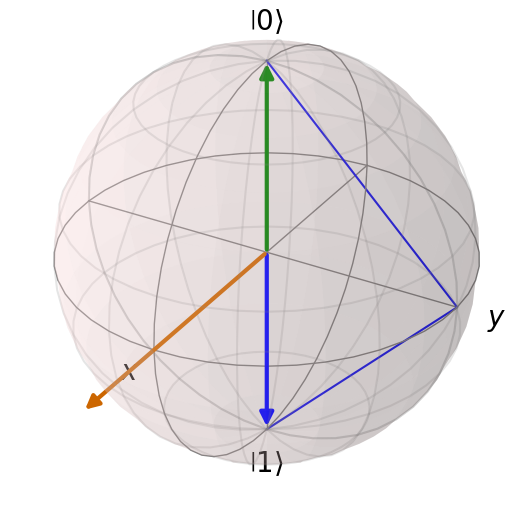

In [3]:
# Calculations 
init_state = define_init_state(a, b, phase_diff)
init_state_vector = state_to_vector(init_state)
bloch_sphere.add_vectors(init_state_vector)

#1st pulse
if True:
    H, rabi_vector = Hamiltonian(Omega_Rabi, detu, light_phase)
    bloch_sphere.add_vectors(rabi_vector)
    # Convert initial state to vector
    t = [0, tau] #interaction time
    result, vec_after_H1 = plot_H_vs_time(H, t, init_state, add_arc = True, add_points=False, plotFlag=False)
    bloch_sphere.add_vectors(vec_after_H1)

#2nd pulse 
if False:
    Omega_Rabi = Omega_Rabi
    detu = 0
    light_phase = 0*np.pi
    # H, rabi_vector = Hamiltonian(Omega_Rabi, detu, light_phase)
    # bloch_sphere.add_vectors(rabi_vector)
    t = [0, tau] #interaction time 
    result, vec_after_H = plot_H_vs_time(H, t, result.final_state, add_arc = False, add_points=False, plotFlag=False)
    bloch_sphere.add_vectors(vec_after_H) 

    print(result.final_state[1])

# Add annotations to the vectors on the Bloch sphere
# Exact annotation positions have to be adjusted manually for better visibility
if False:
    bloch_sphere.add_annotation(init_state_vector - np.array([0.3,0.3,0]),'initial state')
    bloch_sphere.add_annotation(rabi_vector - np.array([0.7,0.4,0]),'Rabi vector')  
    bloch_sphere.add_annotation(vec_after_H1 - np.array([0.35,0.1,0]),'after \n1st pulse')
    bloch_sphere.add_annotation(vec_after_H - np.array([0.35,0.1,0]),'after \n2nd pulse')

display(bloch_sphere)

# Homework questions:

1. **Understand the Hamiltonian function and the Hamiltonian itself.**  
   How does it relate to the Rabi experiment that we discussed today?

   answer: The Hamiltonian describes the time evolution of the state on the Bloch sphere. It takes into account the applied magnetic field (through Ω)

   δ = w - w_L -> δ=0, wenn w = w_L. hw_L = E1 - E0 of the spins. w_L is the natural frequency

   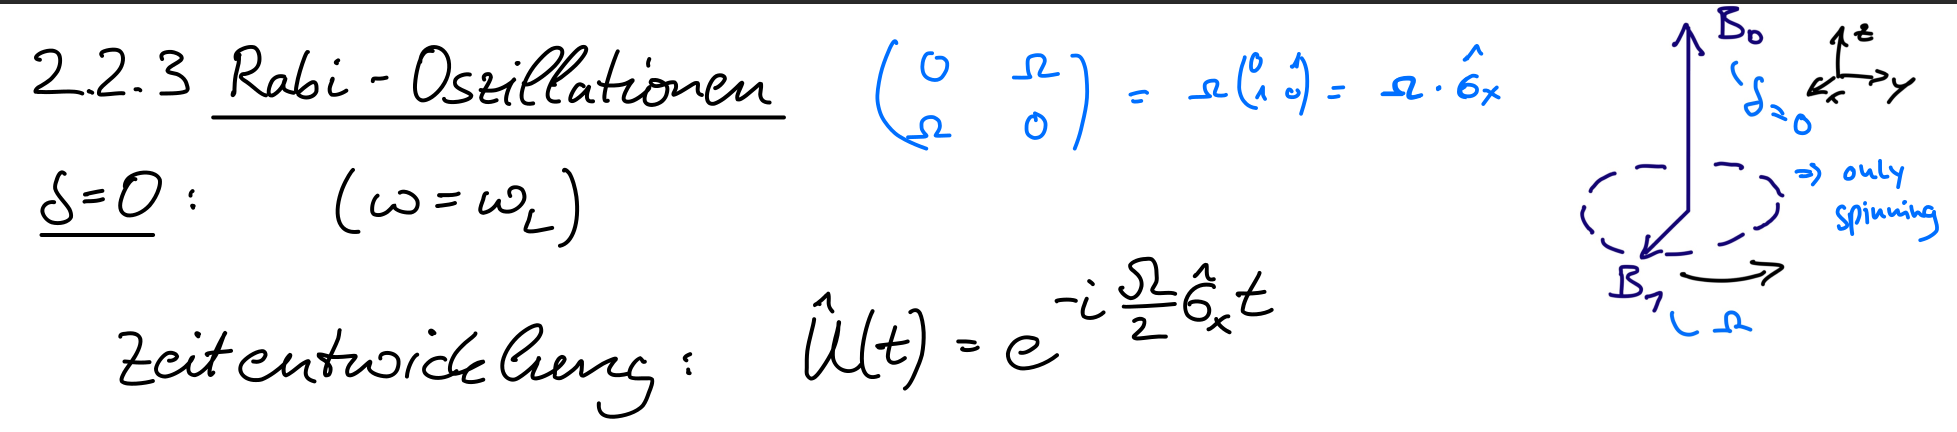
   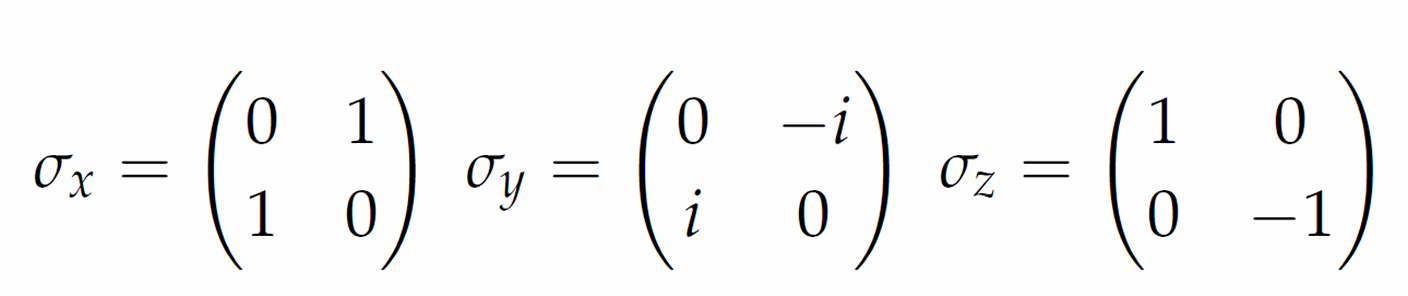

2. **Play with Rabi time, Rabi frequency, and light phase.**  
   How can these parameters be understood in our experiment (i.e., what is Rabi frequency)?

   answer:
   - The Rabi time TRabi​ is the time it takes for the qubit to rotate by π radians (half of a full oscillation). -> state flip or spin flip
   - Rabi frequency Ω is a measure of how quickly the qubit's state oscillates between ∣↑⟩∣↑⟩ and ∣↓⟩∣↓⟩
   - determines how the qubit rotates: around the x-axis, y-axis, or intermediate axis in the xy-plane. By tuning the phase, you can control where the qubit evolves to on the Bloch sphere after a certain time.

   - 1: simple spin up spin down flips
   - 2: detuning causes flip in a tilted way -> spin down never reached. light phase causes rotation in xy plane
   - 3: rotation axis is inverted due to light phase


   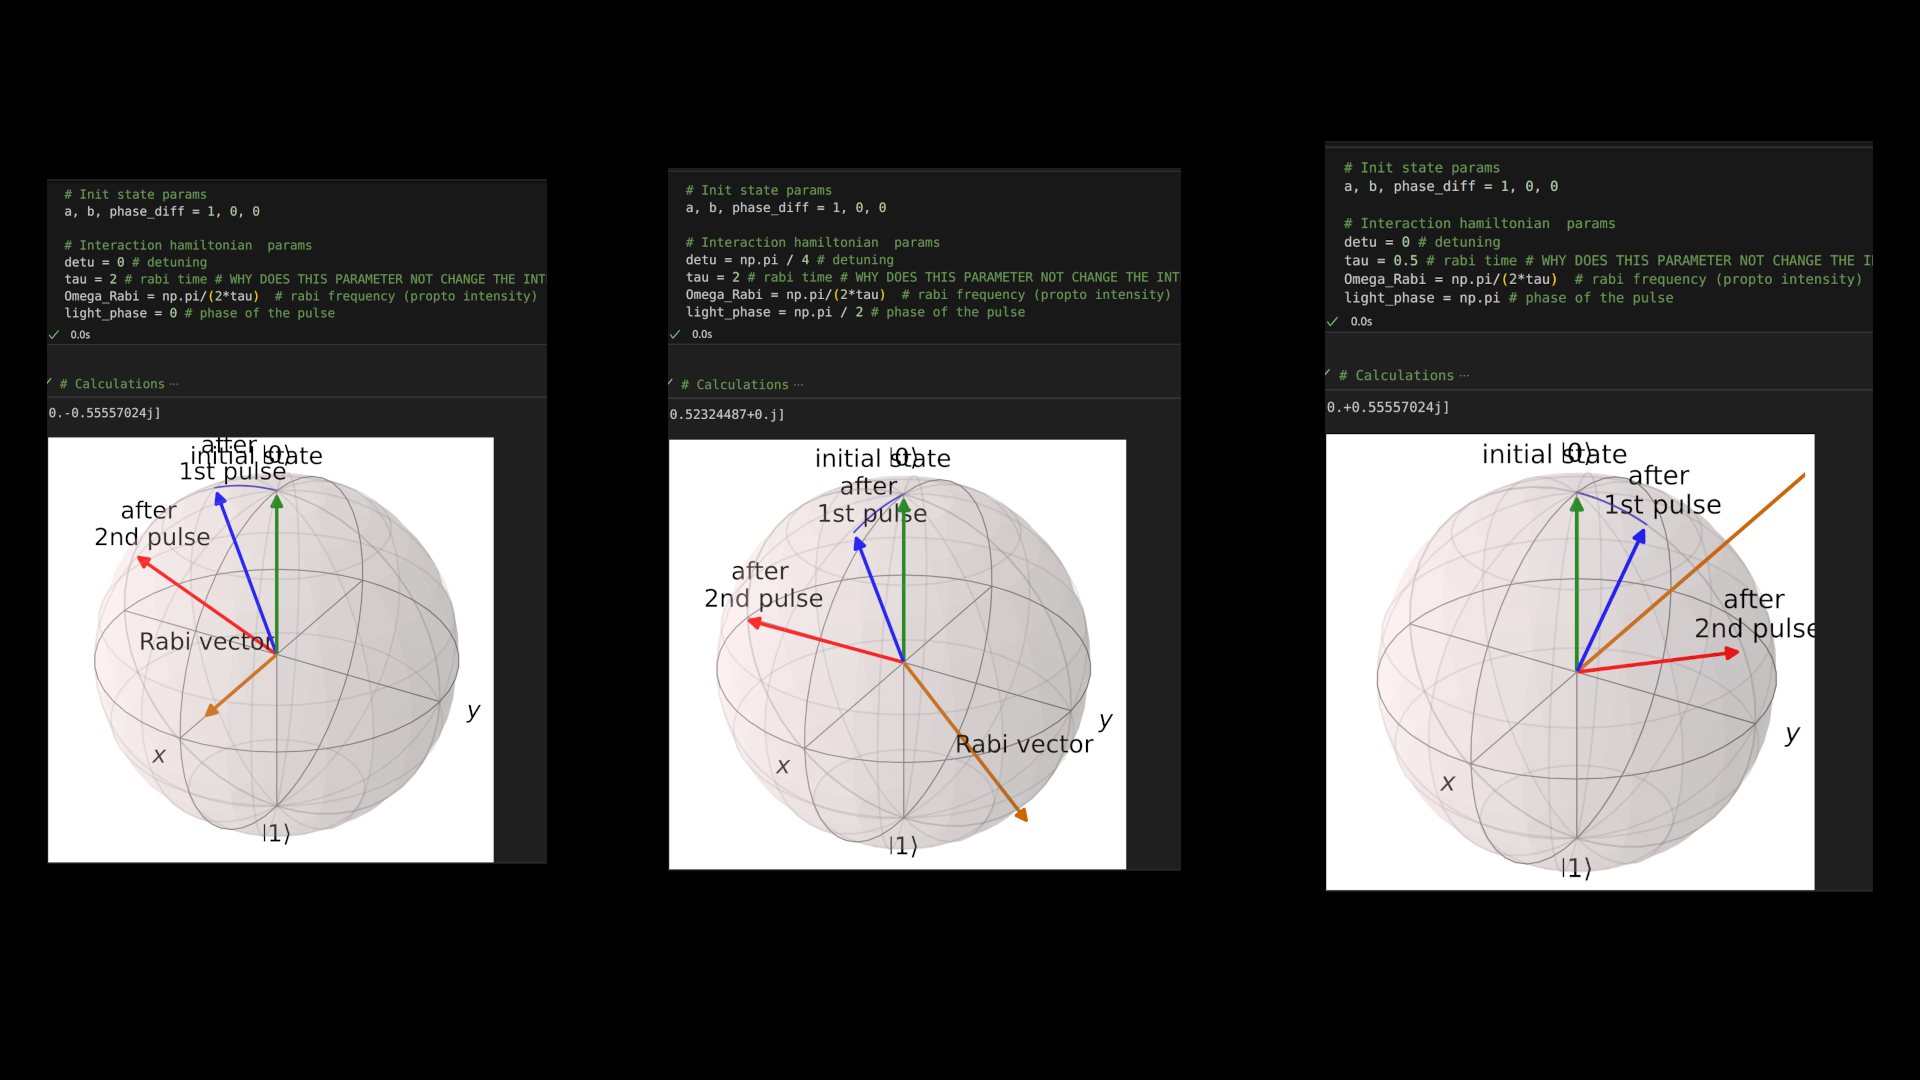

3. **Try to make a case for a Ramsey-type experiment.**  
   What would you expect for the final state when you have different dark times or if there is some detuning?  

   answer: Lets assume we start in spin up and *many* ramsey sequences are made with varying dark times and no detuning. at the end (after the second π/2 pulse) all states end up perfectly on the spin down state. If during the dark time there was some detuning, then there is a rotation on the xy-plane. After the second π/2 pulse the state ends up on the xz plane. 

   --> a ramsey pulse can be used to measure if there is detuning.
   --> if the dark time is always the same, my guess is that the detuning can be measured 

   What happens if there is some noise in the system?

   answer: (guess) decoherence happens. the results look like in the paper after 20 ms.

   What if you are slightly detuned from a transition?

---

*All of the above are easy to implement in the given code. For me, it is important that you understand the physical outcome of different cases.*